# Taller 2

El siguiente taller es elaborado por:  <br/>
Johana Alejandra Rátiva <br/>
Juan Manuel Rivera <br/>


**Contexto:** La empresa HabitAlpes tiene un portafolio variado para el sector inmobiliario. Actualmente buscan implementar una herramienta para el calculo de precio de venta de apartamentos en la ciudad de Bogotá.

**Escenario actual:** 
* El calculo del precio de venta del inmueble toma 6 horas de trabajo de un perito ( $ 9500 por hora ). 
* HabitAlpes avalua 500 apartamentos al mes 

<span style="color:red; font-weight:bold;">Objetivo:</span> Usar un algoritmo de machine learning capaz de estimar el precio de un inmueble que permita al perito realizar su trabajo en 1 hora. 

**Implicaciones previstas:** 
* Por cada avaluo subestimado en más de 20M el cliente solicitará un avalúo presencial
* Las sobreestimaciones no son reportadas

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Entendimiento y preparación de los datos

In [475]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 100)

pd.set_option('display.float_format', '{:,.0f}'.format)

df = pd.read_csv('./apartamentos.csv')
df.head()

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
0,66d86c7eceda690e85508760,4133491,APARTAMENTO,VENTA,"339,000,000",76,3,2,"300,000",1,BRITALIA,3,ENTRE 10 Y 20 ANOS,5,-74,CARRERA 55A # 163-35,"apartamento en venta de 76m2, con vista exteri...",habi.co,2024-08-13 10:34:47.315,2024-07-03 23:27:30.843,https://habi.co/page-data/venta-apartamentos/1...,[{'fecha': {'$date': '2024-07-03T23:27:30.843Z...,NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,URB. PICADELLY,Toberin - Foundever,"1,142",0,PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...,426,1
1,66d86c7eceda690e85508761,3889852,APARTAMENTO,VENTA,"223,000,000",63,3,2,NaN,0,SAN CRISTOBAL NORTE,3,MAS DE 20 ANOS,5,-74,CARRERA 7F # 153 - 75,"apartamento en venta de 60m2, con vista interi...",habi.co,2024-09-03 23:46:46.547,2024-07-03 23:27:31.667,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,0,0,0,0,0,False,USAQUEN,BARRANCAS PERLAS DEL NORTE,Mazurén,"2,385",0,PARQUE ZONAL ALTA BLANCA,472,1
2,66d86c7eceda690e85508762,4386770,APARTAMENTO,VENTA,"440,898,168",54,3,2,"305,000",0,LA SABANA,3,ENTRE 0 Y 5 ANOS,5,-74,CARRERA 69C #2 - 60,"apartamento en venta de 54m2, con vista exteri...",habi.co,2024-07-10 18:19:39.749,2024-07-03 23:27:31.886,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,LOS MARTIRES,SAN VICTORINO,De La Sabana,232,1,PARQUE METROPOLITANO TERCER MILENIO,961,0
3,66d86c7eceda690e85508763,4210060,APARTAMENTO,VENTA,"158,000,000",43,2,2,"106,600",0,TIBABUYES,2,ENTRE 10 Y 20 ANOS,5,-74,CALLE 131C # 126-95,"apartamento en venta de 43 m2, con vista inter...",habi.co,2024-07-10 18:19:03.061,2024-07-03 23:27:32.141,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,SUBA,LA ESTRELLA II,Portal Suba,"2,275",0,PARQUE ZONAL LA GAITANA,540,0
4,66d86c7eceda690e85508764,4063762,APARTAMENTO,VENTA,"222,800,000",48,3,2,"151,000",0,VERBENAL,3,MAS DE 20 ANOS,5,-74,CARRERA 5 # 187-15,"apartamento duplex en venta de 48m2, con vista...",habi.co,2024-09-03 23:46:46.592,2024-07-03 23:27:32.361,https://habi.co/page-data/venta-apartamentos/1...,[],NaN,NaN,NaN,0,NaN,NaN,0,0,0,0,1,0,0,0,0,False,USAQUEN,HORIZONTES USAQUEN,Terminal,"2,099",0,PARQUE VECINAL DESARROLLO VERBENAL I,"1,661",0


In [476]:
print(df.shape)
df.info()

(43013, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null  float64
 14  longitud  

In [477]:
df[["tipo_propiedad","tipo_operacion"]].value_counts()

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA               27200
                           ARRIENDO            15515
                           VENTA Y ARRIENDO      228
CASA CON CONJUNTO CERRADO  VENTA                  60
CASA                       VENTA                  10
Name: count, dtype: int64

In [478]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df[["tipo_propiedad","tipo_operacion"]].value_counts(normalize=True)

tipo_propiedad             tipo_operacion  
APARTAMENTO                VENTA              0.632367
                           ARRIENDO           0.360705
                           VENTA Y ARRIENDO   0.005301
CASA CON CONJUNTO CERRADO  VENTA              0.001395
CASA                       VENTA              0.000232
Name: proportion, dtype: float64

**Notas:**  

* La base de datos cuenta con  <span style="color:red; font-weight:bold;">43013 registros y 46 columnas.</span> 

* Se puede evidenciar que en su mayoría se tiene registro de inmuebles de tipo "APARTAMENTO". con tipo de oferta "VENTA" esta característica combinada representa un 63% de los datos lo cual es un buen incio para abordar el caso de negocio actual.

* Se propone filtrar la base de datos con estas características dado que la variable respuesta debe ser precio de venta para inmuebles de tipo apartamento.

(Se deja como opción analizar el ratio de los inmuebles con doble oferta (venta y arriendo) para obtener un ratio que permita imputar la variable precio_venta a partir de la operacion ( precio_arriendo * ratio ) de presentarse la necesidad de contar con mas datos.) (Ratio sugerido: 0.006)

In [479]:
pd.set_option('display.float_format', '{:,.6f}'.format)
df["ratio_inmobiliario"]=df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
       "precio_arriendo"] / df.loc[(~df["precio_arriendo"].isna()) & (~df["precio_venta"].isna()),
                                 "precio_venta"]
df["ratio_inmobiliario"].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.9,0.99])

count   403.000000
mean      0.138381
std       0.476284
min       0.000004
1%        0.002526
5%        0.003534
25%       0.004581
50%       0.005185
75%       0.006107
90%       0.881688
99%       1.263752
max       5.142857
Name: ratio_inmobiliario, dtype: float64

In [480]:
# Filtar el dataframe para inmuebles tipo APARTAMENTO y operacion VENTA o VENTA Y ARRIENDO
df =df.loc[(df["tipo_propiedad"]=="APARTAMENTO") & (df["tipo_operacion"].isin(['VENTA','VENTA Y ARRIENDO']))]
df.shape

(27428, 47)

In [481]:
# Prueba de consistencia después del filtrado
df.loc[df["precio_venta"].isna()]

,_id,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,latitud,longitud,direccion,descripcion,website,last_view,datetime,url,timeline,estado,compañia,precio_arriendo,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque,ratio_inmobiliario


<span style="color:red; font-weight:bold;">La base filtrada tiene 27428 registros de apartamentos con valores de venta diligenciados</span> 

## Analisis Exploratorio

C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\3974092739.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\3974092739.py:12: FutureWarning: 

Passing `palette` 

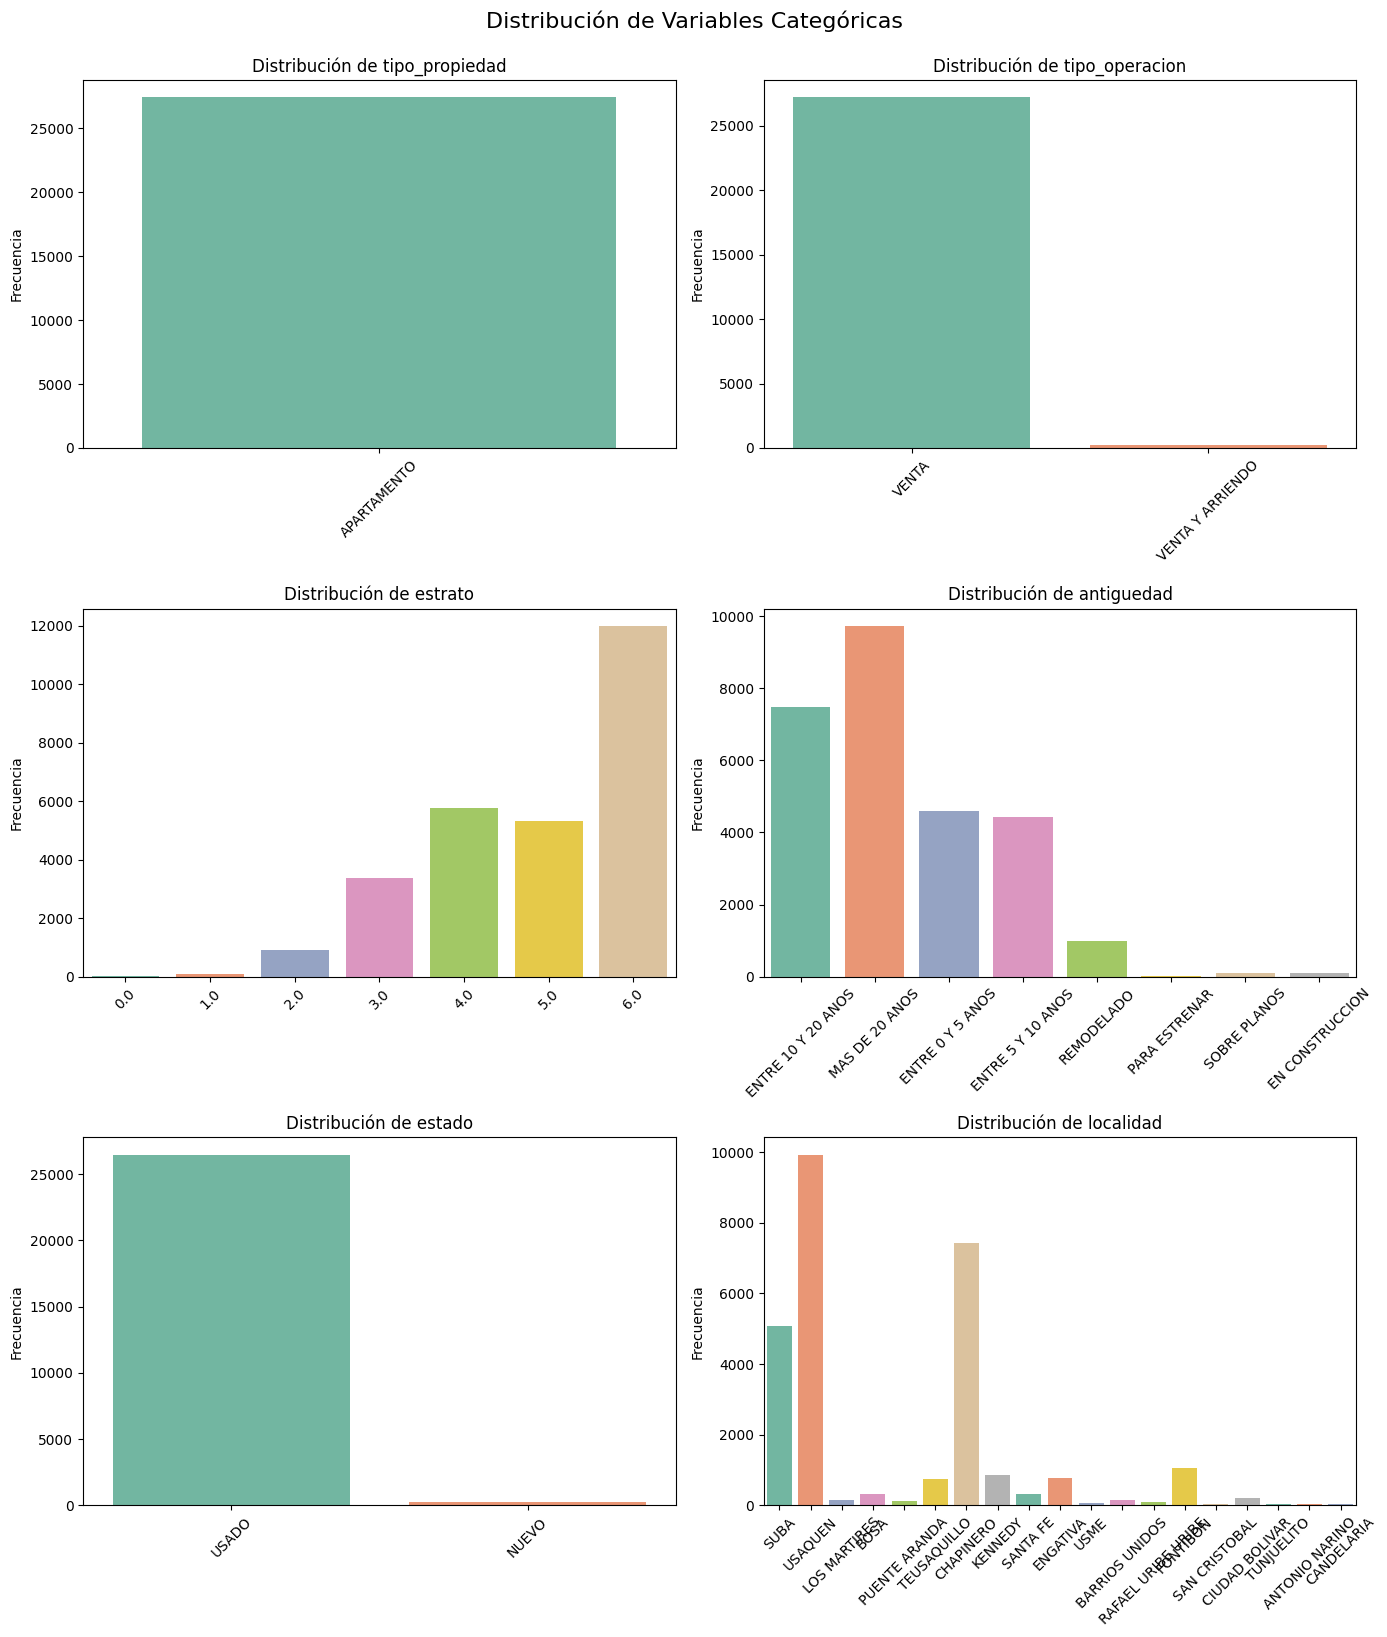

In [482]:
# Graficar distribuciones de variables categóricas
columnas_categoricas = ['tipo_propiedad','tipo_operacion','estrato',
                        'antiguedad','estado','localidad']

num_cols = 2  # columnas de subplots
num_rows = (len(columnas_categoricas) + 1) // num_cols  # filas necesarias

plt.figure(figsize=(14, 16))

for i, col in enumerate(columnas_categoricas, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribución de {col}')
    plt.xlabel('')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Distribución de Variables Categóricas", fontsize=16, y=1.02)
plt.show()

C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\1194927509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette='Set3')
C:\Users\jarat\AppData\Local\Temp\ipykernel_31096\1194927509.py:15: Fu

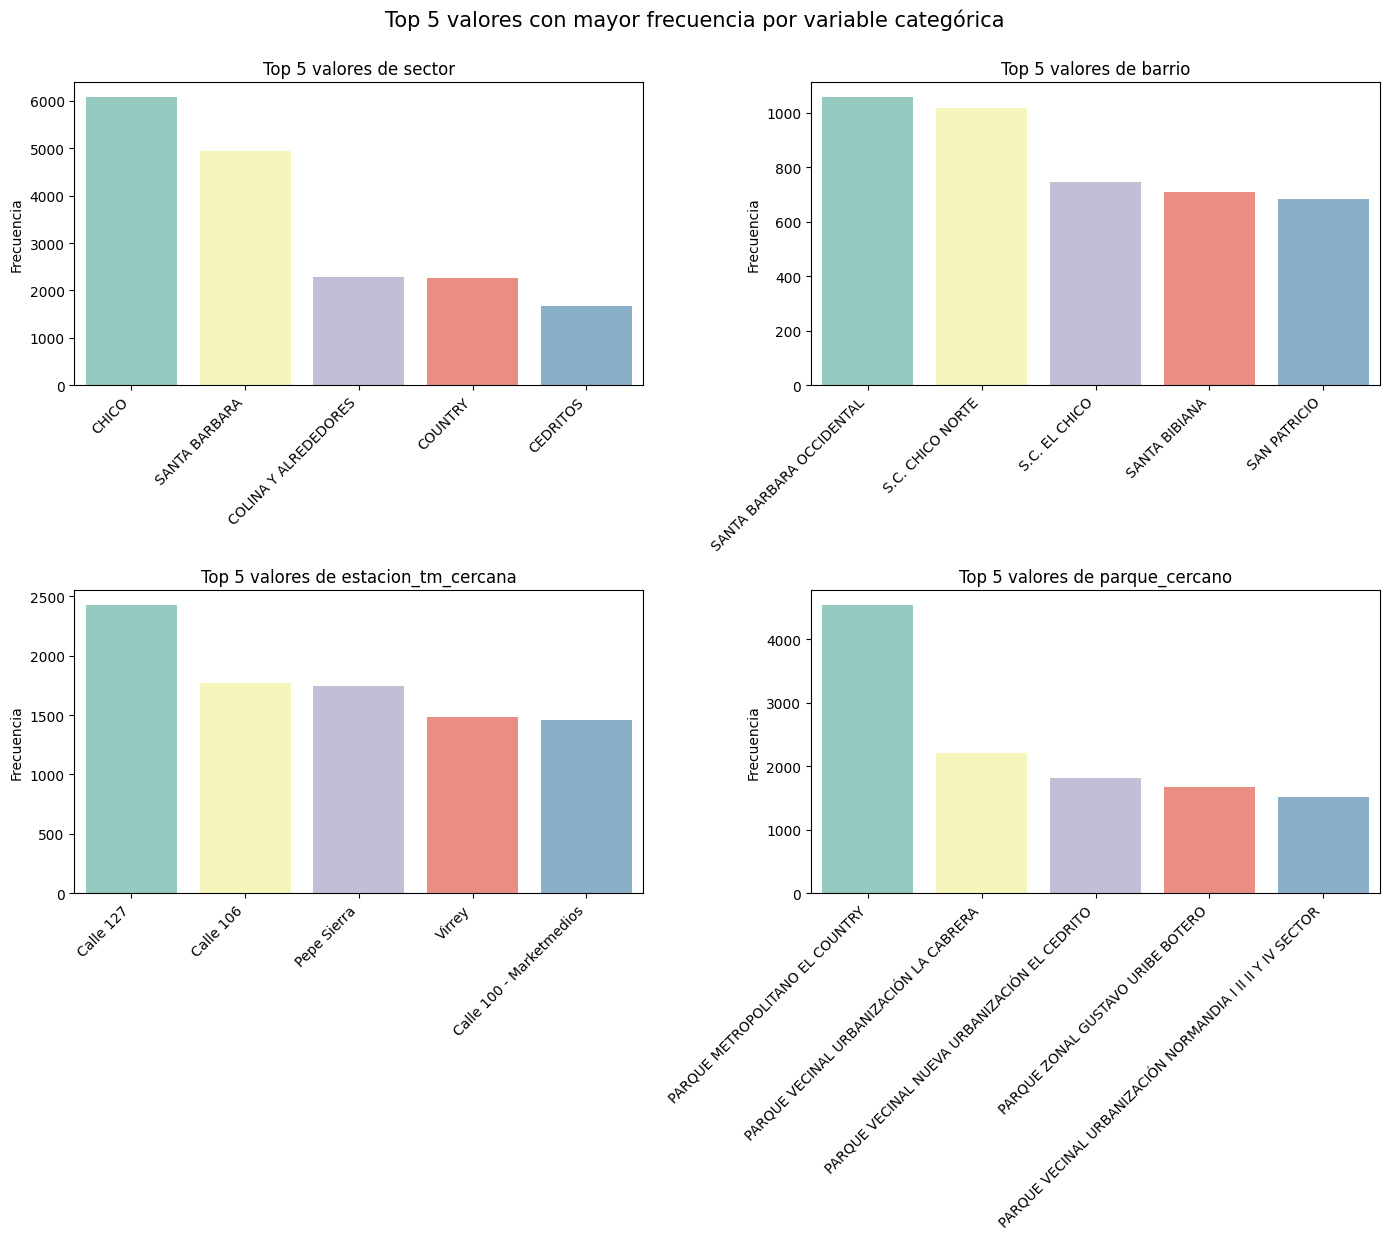

In [483]:
# Variables ccategoricas adicionales que contienen muchas clases por lo cual se priorizan las top 5
import matplotlib.pyplot as plt
import seaborn as sns

columnas_top5 = ['sector', 'barrio', 'estacion_tm_cercana', 'parque_cercano']

plt.figure(figsize=(14, 12))

for i, col in enumerate(columnas_top5, 1):
    plt.subplot(2, 2, i)

    # Obtener top 5 valores más frecuentes
    top5 = df[col].value_counts().nlargest(5)

    sns.barplot(x=top5.index, y=top5.values, palette='Set3')
    plt.title(f'Top 5 valores de {col}')
    plt.ylabel('Frecuencia')
    plt.xlabel('')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle('Top 5 valores con mayor frecuencia por variable categórica', y=1.03, fontsize=15)
plt.show()


Notas:

<span style="color:red; font-weight:bold;">Descripción de variables categoricas: </span> 

* Estrato: Aunque existen inmuebles publicados en todos los estratos, se observa un predominio marcado del estrato 6, seguido de los estratos 4 y 5. Esto indica una mayor oferta en zonas de alta capacidad adquisitiva.

* Antigüedad: La mayoría de los apartamentos corresponde a inmuebles usados, con una concentración principal en los segmentos de más de 20 años y entre 10 y 20 años. Los inmuebles nuevos, en construcción o para estrenar presentan participaciones menores.

* Localidad y barrio: Las localidades de Usaquén, Teusaquillo y Suba concentran la mayor cantidad de registros. A nivel de barrios y sectores, destacan Chicó, Santa Bárbara y Country, entre otros, lo que refuerza el patrón de concentración geográfica en zonas de estratos altos.

* Variables espaciales relacionadas (estación de TransMilenio cercana y parque cercano): Su distribución refleja el mismo patrón geográfico observado para localidad y barrio. Se puede afirmar que existe una asociación espacial clara, lo cual sugiere que estas variables podrían aportar información redundante. Por ahora se mantienen en el análisis, dejando que el modelo determine su relevancia.

<span style="color:red; font-weight:bold;"> Hallazgos que motivan pasos siguientes </span>

Propendiendo por una mejor caldiad del dataset:

* Revisión y ajuste del estrato: Se identifican frecuencias bajas en estratos 0 y 1 que probablemente corresponden a errores de registro. Se propone imputarlos con base en la moda del estrato por barrio, pero solo en los casos donde la diferencia entre el estrato reportado y el estrato modal sea mayor o igual a 2, para evitar imputaciones excesivas.

* Acotar el universo del análisis: Para esta primera iteración se propone excluir inmuebles clasificados como "PARA ESTRENAR", "SOBRE PLANOS" y "EN CONSTRUCCION", con el fin de ajustar un modelo enfocado exclusivamente en apartamentos usados y evitar mezclar dinámicas de precios de mercados diferentes.


<span style="color:red; font-weight:bold;"> Limpieza del dataset </span>


A continuación, se describe la variable dependiente precio_venta por estrato socioeconómico, con el propósito de identificar atípicos y asegurar una imputación controlada.

El análisis descriptivo inicial muestra que los estratos 0 y 1 presentan intervalos de precio que se solapan con estratos más altos, lo cual sugiere posibles errores de captura o inconsistencias en la clasificación.
Para abordar esto, se calculó la moda del estrato por barrio y luego se comparó con el estrato registrado. Con esta diferencia, se imputaron únicamente aquellos inmuebles cuya discrepancia entre la moda del barrio y el valor registrado era mayor o igual a dos niveles socioeconómicos.

En total, se realizaron 412 ajustes de estrato.
Posteriormente, y una vez depurados los estratos inconsistentes, se identificaron precios de venta superiores al percentil 0.99 dentro de cada estrato.

Dado que algunos inmuebles pueden requerir métodos de valoración especializados (como enfoque de renta o análisis de desarrollo potencial) o corresponder a errores de captura, se decidió eliminar los atípicos por estrato que superan el percentil 0.99 o sean inferiores al percentil 0.003
Como resultado, se excluyeron 355 inmuebles con precios de venta extraordinariamente altoso bajos en relación con su estrato.

Adicionalmente se eliminaron 78 atipicos por areas muy pequeñas o muy grandes.

In [484]:
# Revision de estadisticas por estrato antes de la imputación de estrato

pd.set_option('display.float_format', '{:,.0f}'.format)

df= df.loc[~df["antiguedad"].isin(["PARA ESTRENAR","SOBRE PLANOS","EN CONSTRUCCION"])] 

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe()    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,max
0,0,7,"2,526,857,143","1,066,215,649","850,000,000","1,875,000,000","2,500,000,000","3,394,000,000","3,800,000,000"
1,1,79,"616,096,893","930,252,028","83,000,000","131,819,540","162,000,000","447,500,000","4,400,000,000"
2,2,900,"495,891,757","9,495,472,694","76,000,000","133,375,000","159,930,000","180,000,000","285,000,000,000"
3,3,"3,321","351,403,643","3,386,204,708","100,000,000","198,000,000","256,000,000","331,500,000","195,000,000,000"
4,4,"5,689","692,388,018","10,034,337,527","1,100,000","350,000,000","450,000,000","595,000,000","690,000,000,000"
5,5,"5,234","2,307,273,338","42,857,741,803","1,160,000","525,000,000","717,000,000","995,000,000","2,100,000,000,000"
6,6,"11,971","3,954,459,285","79,333,434,345","1,000,000","863,000,000","1,350,000,000","2,100,000,000","4,250,000,000,000"


In [485]:
# Conteo de estratos inconsistentes a imputar
reglas = df.groupby("barrio")["estrato"].agg(lambda x: x.mode()[0])
df["estrato_inconsistente"] = df["estrato"] != df["barrio"].map(reglas)

df_diff = (
    df[["precio_venta","barrio","estrato","estrato_inconsistente"]]
    .loc[df["estrato_inconsistente"]==True]
    .merge(reglas.rename("estrato_moda_por_barrio"), 
           left_on="barrio", right_index=True)
)

df_diff["diferencia_estrato"] = (
    (df_diff["estrato_moda_por_barrio"] - df_diff["estrato"]).abs()
)

df_diff.loc[df_diff["diferencia_estrato"] >= 2].value_counts("estrato")

estrato
6    130
4    124
3     68
2     30
5     27
1     26
0      7
Name: count, dtype: int64

In [486]:
# Ajuste de estratos inconsistentes con diferencia mayor a 2 niveles
df["estrato_moda"] = df["barrio"].map(reglas)
df["diferencia"] = (df["estrato_moda"] - df["estrato"]).abs()

df.loc[df["diferencia"] >= 2, "estrato"] = df.loc[df["diferencia"] >= 2, "estrato_moda"]


In [487]:
# Revision de estadisticas por estrato después de la imputación de estrato

tabla_estadisticas = (
    df.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.003,0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,0.3%,25%,50%,75%,99%,max
0,1,53,"154,202,916","63,316,905","83,000,000","84,404,000","130,000,000","134,640,000","162,000,000","418,400,000","525,000,000"
1,2,881,"495,616,097","9,596,683,147","76,000,000","88,000,000","133,000,000","158,500,000","180,000,000","496,000,000","285,000,000,000"
2,3,"3,307","356,074,603","3,394,496,416","100,000,000","127,063,722","198,000,000","256,000,000","335,000,000","892,220,000","195,000,000,000"
3,4,"5,701","1,274,221,274","44,057,516,762","1,100,000","170,000,000","350,000,000","450,000,000","599,000,000","2,200,000,000","3,240,000,000,000"
4,5,"5,241","2,303,706,198","42,829,203,173","1,160,000","208,600,003","520,000,000","710,000,000","990,000,000","3,000,000,000","2,100,000,000,000"
5,6,"12,018","3,667,279,165","73,469,251,531","1,000,000","161,020,000","853,875,000","1,350,000,000","2,100,000,000","6,546,754,700","4,250,000,000,000"


In [488]:
# # Calcular el percentil 0.003 y 0.99 por estrato y eliminación de atipicos

df["p99"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.99))
df["p003"] = df.groupby("estrato")["precio_venta"].transform(lambda x: x.quantile(0.003))

# Identificar atípicos por estrato (menores al p0.3% o mayores al p99)
df_outliers = df[(df["precio_venta"] > df["p99"]) | 
                 (df["precio_venta"] < df["p003"])]

# Dataset limpio
df_limpio = df[(df["precio_venta"] <= df["p99"]) & 
               (df["precio_venta"] >= df["p003"])]

print("Atípicos eliminados:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados: 355


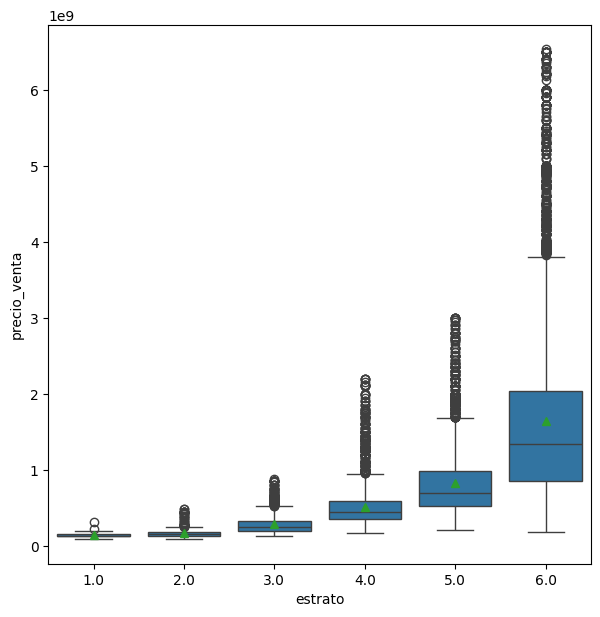

In [489]:
# Plotting Wage by club
plt.figure(figsize=(7, 7))
ax = sns.boxplot(
    data=df_limpio#.loc[df["estrato"].isin([2,3])]
    ,
    x='estrato',
    y='precio_venta',
    showmeans=True
)


plt.show()

Se observa un comportamiento coherente de los precios de venta por estrato, donde las medias de los estratos más altos superan a las de los estratos más bajos, como sería esperado.
Además, gracias al proceso de limpieza de atípicos, los intervalos de precio correspondientes a cada estrato muestran una separación más definida y consistente.

In [490]:
tabla_estadisticas = (
    df_limpio.groupby("estrato")["precio_venta"]
      .describe(percentiles= [0.25, 0.5, 0.75, 0.99] )    # count, mean, std, min, quartiles, max
      .reset_index()
)

tabla_estadisticas

,estrato,count,mean,std,min,25%,50%,75%,99%,max
0,1,51,"148,328,521","35,818,799","92,000,000","130,402,322","134,640,000","162,000,000","271,248,000","320,000,000"
1,2,870,"165,508,944","52,735,857","88,000,000","133,000,000","158,100,000","179,900,000","433,100,000","485,000,000"
2,3,"3,263","281,841,379","110,651,592","127,069,414","198,000,000","255,000,000","330,000,000","662,830,412","880,000,000"
3,4,"5,628","509,026,360","249,654,193","170,000,000","350,000,000","450,000,000","590,000,000","1,550,000,000","2,200,000,000"
4,5,"5,174","827,775,010","436,295,688","210,000,000","520,000,000","700,000,000","985,000,000","2,413,500,000","3,000,000,000"
5,6,"11,860","1,638,934,563","1,087,356,738","180,000,000","853,024,000","1,340,000,000","2,040,000,000","5,500,000,000","6,530,910,000"


In [491]:
df_limpio.shape

(26846, 52)

<span style="color:red; font-weight:bold;"> Como resultado de este proceso de depuración y control de calidad, el dataset queda conformado por 26846 inmuebles de tipo apartamento usado </span>

En este punto se procede plotear las variables cuantitativas


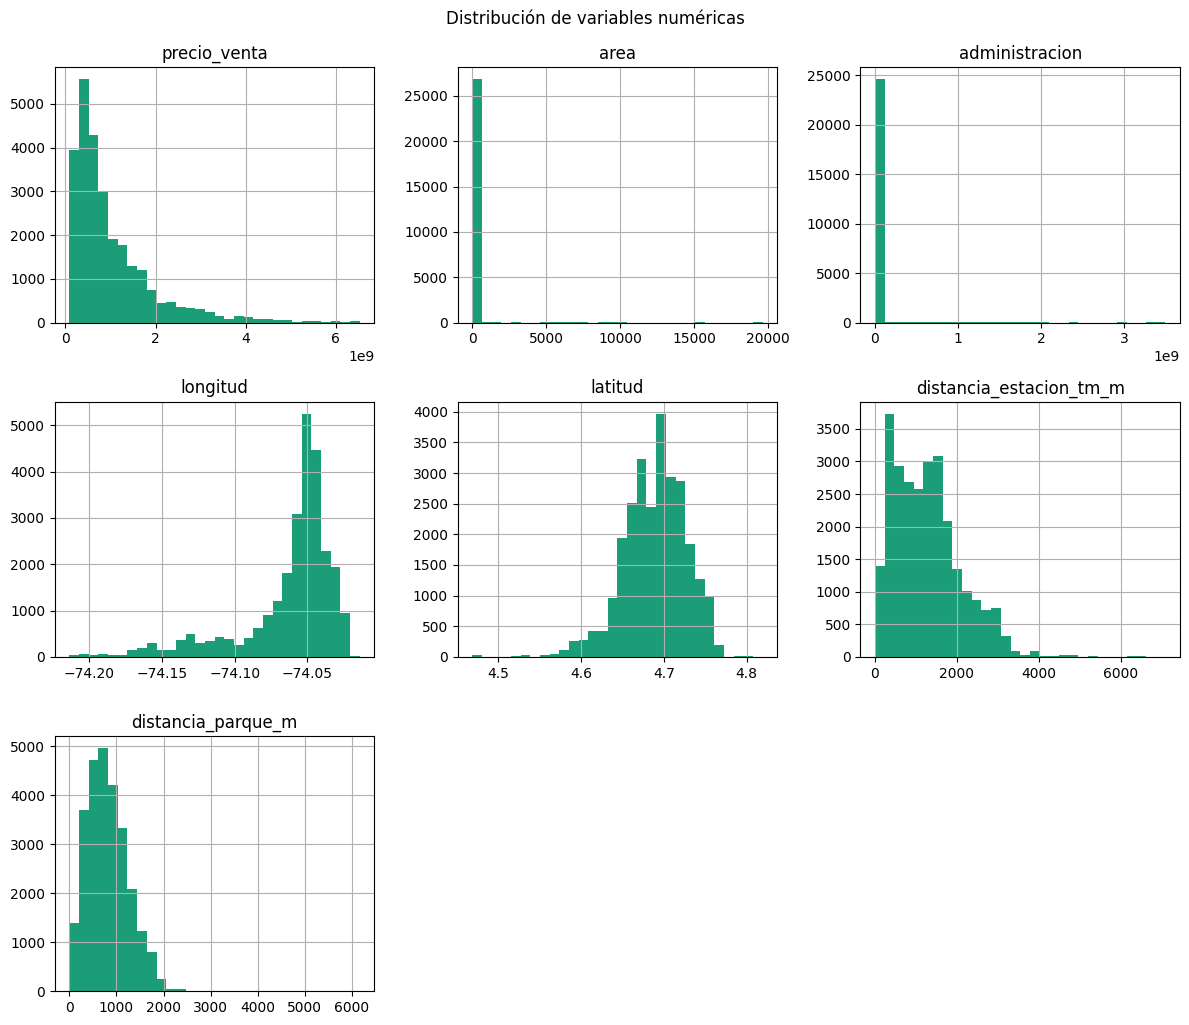

In [492]:
# Histogramas de variables numéricas
pd.set_option('display.float_format', '{:,.0f}'.format)

columnas_numericas = ['precio_venta','area','administracion','longitud','latitud','distancia_estacion_tm_m','distancia_parque_m']
df_limpio[columnas_numericas].hist(bins=30, figsize=(12,10), color='#1b9e77')
plt.tight_layout()
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.show()



In [493]:
df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m']].describe(percentiles=[0.002,0.01,0.05,0.25,0.5,0.75,0.9,0.999])

,precio_venta,area,administracion,longitud,latitud,distancia_estacion_tm_m,distancia_parque_m
count,"26,846","26,846","24,704","26,846","26,846","26,846","26,846"
mean,"1,030,197,353",142,"5,046,574",-74,5,"1,282",817
std,"946,557,425",234,"76,633,199",0,0,837,443
min,"88,000,000",0,1,-74,4,5,0
0.2%,"114,690,000",18,"10,000",-74,5,38,38
1%,"135,000,000",29,"10,000",-74,5,112,87
5%,"188,834,071",43,"110,000",-74,5,237,202
25%,"410,000,000",70,"350,000",-74,5,586,490
50%,"705,000,000",110,"650,000",-74,5,"1,195",765
75%,"1,300,000,000",180,"1,178,000",-74,5,"1,728","1,092"


In [494]:
# outliers de area menor a 0.002 o mayores a 0.99

df_outliers = df_limpio[(df_limpio["area"] < df_limpio["area"].quantile(0.002)) | 
                 (df_limpio["area"] > df_limpio["area"].quantile(0.999))]

df_outliers

# Dataset limpio
df_limpio = df_limpio[(df_limpio["area"] > df_limpio["area"].quantile(0.002))  & 
              (df_limpio["area"] < df_limpio["area"].quantile(0.999))]

print("Atípicos eliminados por area:", len(df_outliers))


### revisar la posibilidad de limpiar estratos 4,5,6 con precios muy bajos (0.3% - 99%)

Atípicos eliminados por area: 78


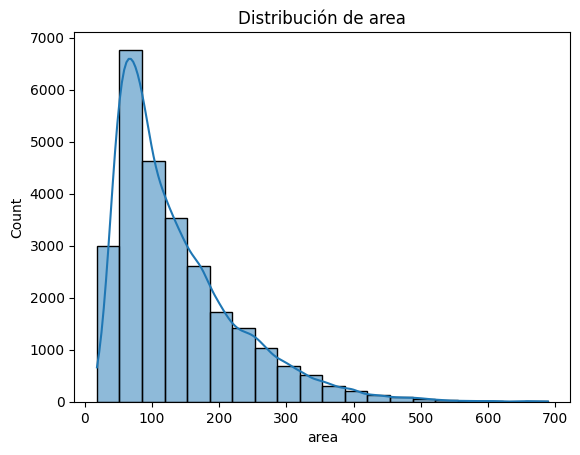

In [495]:
sns.histplot(df_limpio['area'], bins=20, kde=True)
plt.title('Distribución de area')
plt.xlabel('area')
plt.show()

Dado que nuestro modelo tiene el obejtivo de predecir el valor de venta para inmuebles de tipo apartamento, vale la pena aterrizar la realidad de los apartamentos en bogotá en donde un intervalo valido como lo evidencian las estadisticas, son apartamentos de 18 metros cuadrados a 700 metros. 

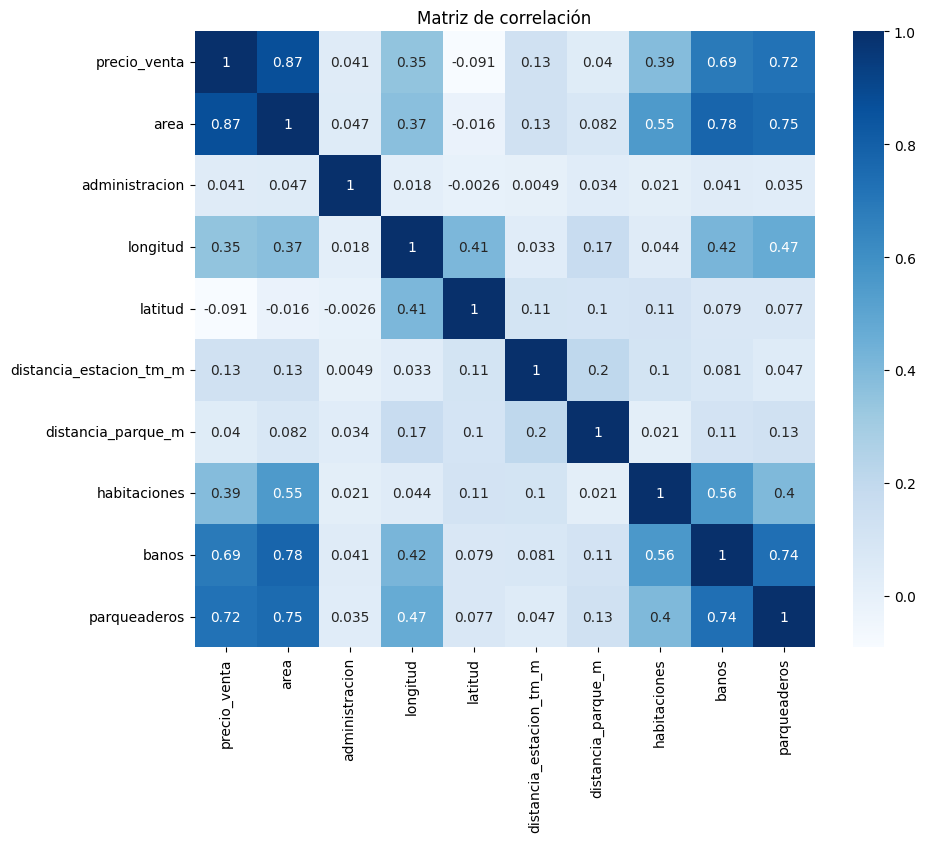

In [496]:
import numpy as np
correlation = df_limpio[['precio_venta','area','administracion','longitud','latitud',
           'distancia_estacion_tm_m','distancia_parque_m','habitaciones','banos','parqueaderos']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Matriz de correlación')
plt.show()

Esta matriz de correlación nos permite evidenciar que existe una relacion directa entre precio de venta y area, también vemos una relacion directa con longitud y en medor medida con distancia a transmilenio.

In [497]:
# Revision de variables booleanas
boolean_columns = ['jacuzzi','piscina','salon_comunal','terraza',
                   'vigilancia','chimenea','permite_mascotas','gimnasio',
                   'ascensor','conjunto_cerrado','coords_modified','is_cerca_estacion_tm','is_cerca_parque','closets']

for col in boolean_columns:
    print(f'Valores únicos en {col}: {df_limpio[col].unique()}')



tabla = {}

for col in boolean_columns:
    tabla[col] = df_limpio[col].value_counts(dropna=False)

tabla_value_counts = pd.DataFrame(tabla).fillna(0).astype(int)
tabla_value_counts


Valores únicos en jacuzzi: [ 0.  1. nan]
Valores únicos en piscina: [ 0.  1. nan]
Valores únicos en salon_comunal: [ 0. nan]
Valores únicos en terraza: [ 0.  1. nan]
Valores únicos en vigilancia: [ 0.  1. nan]
Valores únicos en chimenea: [ 0. nan]
Valores únicos en permite_mascotas: [ 0. nan]
Valores únicos en gimnasio: [ 0.  1. nan]
Valores únicos en ascensor: [ 0.  1. nan]
Valores únicos en conjunto_cerrado: [ 1.  0. nan]
Valores únicos en coords_modified: [False  True]
Valores únicos en is_cerca_estacion_tm: [0 1]
Valores únicos en is_cerca_parque: [1 0]
Valores únicos en closets: [nan]


,jacuzzi,piscina,salon_comunal,terraza,vigilancia,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,is_cerca_estacion_tm,is_cerca_parque,closets
0,25405,24055,26762,26728,10766,26762,26762,18255,9398,15207,26223,21306,19812,0
1,1357,2707,0,34,15996,0,0,8507,17364,11555,541,5458,6952,0
NaN,2,2,2,2,2,2,2,2,2,2,0,0,0,26764


<span style="color:red; font-weight:bold;">A partir de el entendimiento de los datos presentado anteriormente se eligen las siguientes variables para la etapa de modelado</span>  

* Variables categoricas: sector,estrato,antiguedad,estado,localidad
* Variables numericas: area,administracion,longitud,latitud,distancia_estacion_tm_m,distancia_parque_m,habitaciones,banos,parqueaderos
* Variables categoricas binarias: jacuzzi, piscina, terraza, vigilancia,	gimnasio,	ascensor,	conjunto_cerrado,	is_cerca_estacion_tm, is_cerca_parque

## Preparacion para el modelado

In [498]:
# quitar valores NaN en variables booleanas

nan_boll= ['jacuzzi','piscina','salon_comunal','terraza',
                   'vigilancia','chimenea','permite_mascotas','gimnasio',
                   'ascensor','conjunto_cerrado','coords_modified','is_cerca_estacion_tm','is_cerca_parque','closets']

df_limpio[nan_boll] = df_limpio[nan_boll].apply(pd.to_numeric, errors='coerce')
df_limpio[nan_boll] = df_limpio[nan_boll].fillna(0)

In [499]:
# limpieza de datos nan y generación de dummys

df_dummies = pd.get_dummies(df_limpio, columns=[#'sector',
                                                'antiguedad','localidad']) # Crea las dummy y elimina las originales

X= df_dummies.drop(columns=['precio_venta','tipo_propiedad','tipo_operacion',
                         'estrato_moda','diferencia','p99','p003','_id','codigo','estrato_inconsistente','descripcion', 
                         'website', 'last_view', 'datetime', 'url', 'timeline', 'compañia','coords_modified',
                         'ratio_inmobiliario', #puede darle pista al modelo
                         'direccion','barrio','estacion_tm_cercana','parque_cercano','closets','piso','precio_arriendo','chimenea','permite_mascotas','salon_comunal',
                         'sector','estado'
                         ])

y= df_dummies['precio_venta']
print("Las caracteristicas iniciales del dataset son:", X.columns , "Para describir la variable", y.name)


#Revisión de valores nulos en X
print(X.isna().sum().sort_values(ascending=False))

# queda pendiente imputar adminitración solo con train


Las caracteristicas iniciales del dataset son: Index(['area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'estrato', 'latitud', 'longitud', 'jacuzzi', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'terraza', 'vigilancia',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'distancia_parque_m',
       'is_cerca_parque', 'antiguedad_ENTRE 0 Y 5 ANOS',
       'antiguedad_ENTRE 10 Y 20 ANOS', 'antiguedad_ENTRE 5 Y 10 ANOS',
       'antiguedad_MAS DE 20 ANOS', 'antiguedad_REMODELADO',
       'localidad_ANTONIO NARINO', 'localidad_BARRIOS UNIDOS',
       'localidad_BOSA', 'localidad_CANDELARIA', 'localidad_CHAPINERO',
       'localidad_CIUDAD BOLIVAR', 'localidad_ENGATIVA', 'localidad_FONTIBON',
       'localidad_KENNEDY', 'localidad_LOS MARTIRES',
       'localidad_PUENTE ARANDA', 'localidad_RAFAEL URIBE URIBE',
       'localidad_SAN CRISTOBAL', 'localidad_SANTA FE', 'localidad_SUBA',
       'localidad_TEUSAQUILLO', 'localidad_TUNJUELITO', 'local

## Modelado

1. definición de X y y a partir del datraframecon dummys creadas
2. Split del datset: traint, test y validation
3. Imputación de valor de administración a partir del train
4. Inicializar el Scalar, encontrar los parametros del escalador a partir del Train, aplicarle transform a validation y a test
5. Entrenar la regresión lineal con los datos train 
6. Predecir los valores de venta para la matriz de validación ( X_valid )
7. Metricas y evaluación (R2, mae , rmse) (Comparar y_valid vs y_valid_pred)

------------------

2. Crear al menos dos modelos distintos para predecir el precio_venta
3. Metricas
4. Elegir un modelo y jsutificarlo, oportunidades de mejora
5. interpretabilidad shapley line 
6. generacion de valor 
7. insights

### 1-6

1. definición de X y y a partir del datraframecon dummys creadas
2. Split del datset: traint, test y validation
3. Imputación de valor de administración a partir del train
4. Inicializar el Scalar, encontrar los parametros del escalador a partir del Train, aplicarle transform a validation y a test
5. Entrenar la regresión lineal con los datos train 
6. Predecir los valores de venta para la matriz de validación ( X_valid )

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1 . Definir X e y (ya hecho arriba)
X = X

y= y


# 2 . Se divide el conjunto inicialmente en train (70%) y temp (30%)
# Luego se divide temp en validacion (15%) y test (15%)

#  Separar en train / temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# Separar temp en valid / test (15% y 15%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

# -----------------------------
# 3. IMPUTACIONES (solo train)
# -----------------------------

# Imputación "administracion"
admin_mediana = X_train['administracion'].median()

X_train['administracion'] = X_train['administracion'].fillna(admin_mediana)
X_valid['administracion'] = X_valid['administracion'].fillna(admin_mediana)
X_test['administracion'] = X_test['administracion'].fillna(admin_mediana)


# -----------------------------
# 4. ESCALAR (solo con train)
# -----------------------------

scaler = StandardScaler()  # Inicializar el escalador. El escalador convierte las variables numericas a una escala comun con media =0 y desviación estándar =1

X_train_scaled = scaler.fit_transform(X_train) # fit_transform hace fit y transform en una sola línea.
                                                    #fit: calcula media y desviación estándar de los datos numericos del train,
                                                    #transform: aplica el escalado a los datos numericos del train                                               
#  el fit solo se hace con los datos del train para evitar el data leakage (fuga de datos)
X_valid_scaled = scaler.transform(X_valid)
# Se usa transform para no "ver" los datos del test en el escalado. No usa fit para no aprender los parametros. 
# Sin embargo si aplica el escalado usando la media y desviacion estandar calculadas con los datos del train.

X_test_scaled = scaler.transform(X_test)


In [501]:
# 5 . Regresion Lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)  # entreno solo con train

# 6. Predicciones y evaluación validación
y_valid_pred = modelo.predict(X_valid_scaled)
residuos =  y_valid_pred -y_valid



Notas:

A partir de las variables seleccionadas en la etapa exploratoria, <span style="color:red; font-weight:bold;">se generaron las variables dummy correspondientes (antiguedad y localidad) </span> y se preparó el dataset para el modelado. <br/> Posteriormente, la información se dividió en tres subconjuntos:
*  Train (70%), 
* Validation (15%) y 
* Test (15%).

Con esta partición definida, se realizó el tratamiento de valores faltantes. En el caso de las variables de tipo booleano, los valores nulos se imputaron con 0, mientras que para variables numéricas (como administración) la imputación se realizó utilizando la mediana calculada exclusivamente sobre el conjunto de entrenamiento, evitando así fuga de información (data leakage).

Luego, el conjunto train se utilizó para calcular la media y desviación estándar necesarias para el escalamiento estandarizado de las variables numéricas. Con estos parámetros, se transformaron los conjuntos de validation y test, manteniendo la consistencia del proceso.

Una vez preparado el conjunto de entrenamiento escalado, se procedió a ajustar un modelo de regresión lineal. Luego, el conjunto de validación se utilizó para generar las predicciones del precio de venta y evaluar el desempeño del modelo.

Finalmente, se calculó la diferencia entre el valor real y el valor predicho, lo que permitió analizar métricas de desempeño y avanzar hacia la interpretación detallada de los resultados que se presenta a continuación.

###  7. Metricas y evaluación 
* R2, mae , rmse 
* Residuos: Comparar y_valid vs y_valid_pred

### R2, mae , rmse 

In [502]:
# 7. Metricas y evaluación
r2 = r2_score(y_valid, y_valid_pred)
mae = mean_absolute_error(y_valid, y_valid_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print(f'R² (coeficiente de determinación): {r2:.3f}')
print(f'MAE (error absoluto medio): {mae:.2f}')
print(f'RMSE (raíz del error cuadrático medio): {rmse:.2f}')
#X_train.columns.to_numpy()


R² (coeficiente de determinación): 0.833
MAE (error absoluto medio): 241550048.81
RMSE (raíz del error cuadrático medio): 377353412.21


In [503]:
y_valid.describe()

count           4,015
mean    1,014,950,140
std       924,607,615
min        90,000,000
25%       410,000,000
50%       700,000,000
75%     1,300,000,000
max     6,500,000,000
Name: precio_venta, dtype: float64

Con las métricas obtenidas en el conjunto Validation, se observa un desempeño adecuado del modelo:

R² = 0.839, lo cual indica que aproximadamente el 83% de la variabilidad del precio de venta está explicada por las variables independientes incluidas en el modelo. Para un mercado inmobiliario tan heterogéneo como el de Bogotá, este nivel de explicación es consistente con un modelo lineal.

<span style="color:red; font-weight:bold;"> El MAE = 241 millones, que frente a la media del conjunto de validación (1.014 millones) corresponde aproximadamente a un 23% de error relativo promedio, puede entenderse como una buena metrica para inmuebles de precios altos.
 </span>
 
El RMSE = 377 millones es mayor que el MAE, lo cual es esperable ya que penaliza más fuertemente los errores grandes. Esto indica que existen casos particulares donde el modelo se equivoca de forma más pronunciada. <span style="color:red; font-weight:bold;">Vale la pena revisar si estas varaiciones se presentan mas en sectores o inmuebles con caracteristicas especificas. </span>

Si comparamos el MAE (237 millones) con la desviación estándar del precio real (924 millones), observamos que el error es bastante menor que la dispersión natural de los precios, lo cual sugiere que el modelo captura una parte relevante de la estructura del mercado.

### Residuos: Comparar y_valid vs y_valid_pred

In [504]:
# Análisis de residuos

pd.set_option("display.precision", 6)

df_valid_results = pd.DataFrame({
    "precio_real": y_valid,
    "precio_predicho": y_valid_pred,
    "residuo": residuos
})

df_valid_results["requiere_perito"] = np.where(
    df_valid_results["residuo"] <= -20_000_000,
    1,  # requiere_perito
    0   # Costo_cero
)

print ("Porcentajes de clasificaciones en validación:")
print(df_valid_results["requiere_perito"].value_counts(normalize=True) * 100)

df_valid_results.head()

Porcentajes de clasificaciones en validación:
requiere_perito
0   55
1   45
Name: proportion, dtype: float64


,precio_real,precio_predicho,residuo,requiere_perito
4682,"1,400,000,000","1,473,096,057","73,096,057",0
41530,"1,290,000,000","763,275,873","-526,724,127",1
27450,"520,000,000","341,410,597","-178,589,403",1
42143,"289,000,000","-54,732,447","-343,732,447",1
20157,"1,850,000,000","1,947,720,954","97,720,954",0


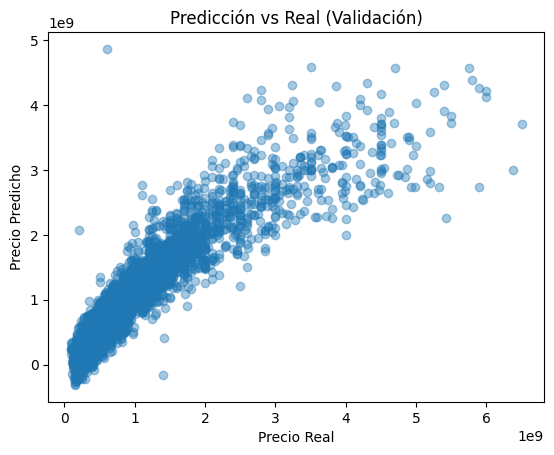

In [505]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_valid_pred, alpha=0.4)
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicción vs Real (Validación)")
plt.show()


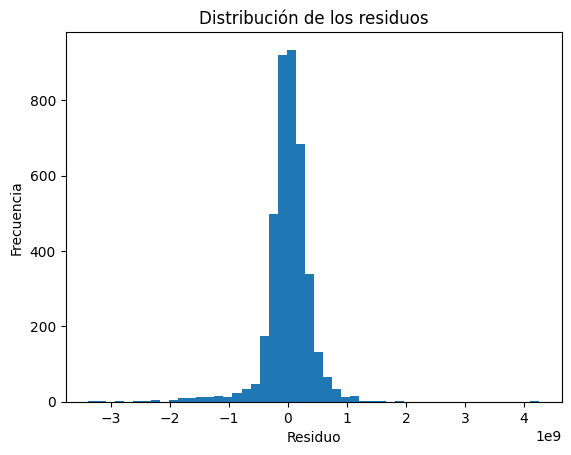

In [506]:
plt.hist(residuos, bins=50)
plt.title("Distribución de los residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()


Al analizar los residuos definidos como la diferencia entre el valor predicho y el valor real (del conjunto de validación) se identificó que:

<span style="color:red; font-weight:bold;">El 55% de los casos del conjunto de validación cumple la restricción del negocio: no existe una subestimación mayor a 20 millones. </span>

Esto implica que:

* El modelo tiende a sobreestimar ligeramente los precios,
* Lo cual es deseable en este caso porque evita costos adicionales asociados al peritaje que se genera cuando el precio predicho es demasiado bajo.

Tambien se púede identificar que la dispersión de los errores es lineal con atipicos asociados a valores altos en las predicciones asociados a precios bajos reales. Esto puede deberse a los pocos datos en estratos bajos. 

Es pertinente analizar si las subestimaciones superiores a 20 millones: se concentran en ciertos rangos de precio, o en ciertos barrios o localidades, o en inmuebles con características particulares (área, antigüedad, estar en un conjunto cerrado o estratos particulares),

Esta revisión permitiría delimitar los segmentos donde el modelo funciona bien y aquellos donde se deteriora, para evaluar ajustes o incluso entrenar un modelo especializado para ciertos nichos (por ejemplo, apartamentos premium).

In [507]:
df_valid_x = pd.concat([X_valid.reset_index(drop=True),
                               df_valid_results.reset_index(drop=True),y_valid.reset_index(drop=True)], axis=1)

df_valid_x["rango_precio"] = pd.cut(
    df_valid_x["precio_real"],
    bins=[0, 400_000_000, 800_000_000, 1_500_000_000, 5_000_000_000, float("inf")],
    labels=["0-400M", "400-800M", "800-1500M", "1500-5000M", "5000M+"]
)

# Rangos de precios con subestimaciones mayores a 20 millones

print(pd.crosstab(
    df_valid_x["rango_precio"],
    df_valid_x["requiere_perito"],
    normalize="index"   # normaliza por fila
) * 100)


requiere_perito  0   1
rango_precio          
0-400M          42  58
400-800M        62  38
800-1500M       71  29
1500-5000M      43  57
5000M+           0 100


<span style="color:red; font-weight:bold;">Se puede identificar que para inmuebles de 400 a 1500 millones, la necesidad de peritaje es inferior 38%
 </span>


### Matriz de confusión 

A partir del analisis de residuos del supuesto baseline (Precio de venta promedio por localidad) vs el resultante de la regresión lineal

Con el objetivo de evaluar si el modelo contribuye efectivamente a reducir las horas de trabajo que un perito debe invertir en la revisión de un inmueble (evitando subestimaciones superiores a 20 millones) se propone establecer como baseline una estimación simple basada en el precio promedio de venta por localidad. Esta estimación será comparada con la predicción del modelo (y_val_pred, obtenida mediante regresión lineal).

La comparación permite determinar si el modelo ofrece un desempeño superior respecto a una regla operativa directa. Este enfoque se adopta bajo el supuesto de que dicha estimación promedio representa de manera razonable el comportamiento actual del proceso y, por tanto, la proporción de casos que hoy requerirían revisión por parte de un perito, dado que no se cuenta con un indicador histórico explícito de esa necesidad.

In [508]:
localidad_cols = [c for c in df_valid_x.columns if c.startswith("localidad_")]

df_valid_x["localidad"] = df_valid_x[localidad_cols] \
    .idxmax(axis=1) \
    .str.replace("localidad_", "")

promedio_localidad = df_valid_x.groupby("localidad")["precio_real"].mean().reset_index()
promedio_localidad.rename(
    columns={"precio_real": "precio_promedio_localidad"},
    inplace=True
)

df_valid_x = df_valid_x.merge(
    promedio_localidad,
    on="localidad",
    how="left"
)

df_valid_x["error_baseline"] =  df_valid_x["precio_promedio_localidad"] -df_valid_x["precio_real"] 

# estimacion de si requiere perito con baseline

df_valid_x["requiere_perito_baseline"] = np.where(
    df_valid_x["error_baseline"] <= -20_000_000,1,0
)    

In [512]:
df_valid_x[["precio_real", "precio_predicho","residuo","requiere_perito","precio_promedio_localidad","error_baseline","requiere_perito_baseline"]].head()

,precio_real,precio_predicho,residuo,requiere_perito,precio_promedio_localidad,error_baseline,requiere_perito_baseline
0,"1,400,000,000","1,473,096,057","73,096,057",0,"986,620,371","-413,379,629",1
1,"1,290,000,000","763,275,873","-526,724,127",1,"986,620,371","-303,379,629",1
2,"520,000,000","341,410,597","-178,589,403",1,"1,711,664,327","1,191,664,327",0
3,"289,000,000","-54,732,447","-343,732,447",1,"683,113,339","394,113,339",0
4,"1,850,000,000","1,947,720,954","97,720,954",0,"683,113,339","-1,166,886,661",1


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Etiqueta real (ya creada correctamente)
y_real_clf = df_valid_x["requiere_perito_baseline"]

# Etiqueta predicha:
# El modelo subestima cuando la predicción es menor que el real en más de 20M
y_pred_clf = df_valid_x["requiere_perito"]

# Matriz de confusión
cm = confusion_matrix(y_real_clf, y_pred_clf)
print("Confusion Matrix:")
print(cm)

# Métricas
print("\nClassification Report:")
print(classification_report(y_real_clf, y_pred_clf))

Confusion Matrix:
[[1479 1136]
 [ 746  654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      2615
           1       0.37      0.47      0.41      1400

    accuracy                           0.53      4015
   macro avg       0.52      0.52      0.51      4015
weighted avg       0.56      0.53      0.54      4015



In [511]:
from sklearn.metrics import confusion_matrix, classification_report

y_real_clf = (y_valid < y_valid.median() - 20_000_000)

y_pred_clf = (y_valid_pred < y_valid - 20_000_000)

cm = confusion_matrix(y_real_clf, y_pred_clf)
print(cm)

print(classification_report(y_real_clf, y_pred_clf))

[[1249  828]
 [ 976  962]]
              precision    recall  f1-score   support

       False       0.56      0.60      0.58      2077
        True       0.54      0.50      0.52      1938

    accuracy                           0.55      4015
   macro avg       0.55      0.55      0.55      4015
weighted avg       0.55      0.55      0.55      4015



## shapley y lime (global y muestra de prediccion individual) 
- interpretacion de como esta funcionando el modelo